# Multivariate Resemblance Analysis (MRA) Dataset C

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for univariate resemblance analisys
from multivariate_resemblance import get_numerical_correlations
from multivariate_resemblance import plot_correlations
from multivariate_resemblance import get_categorical_correlations
from multivariate_resemblance import compute_mra_score

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/C_Obesity_Data_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/C_Obesity_Data_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/C_Obesity_Data_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/C_Obesity_Data_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/C_Obesity_Data_Synthetic_WGANGP.csv'}
categorical_columns = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','Obesity_level']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':       Gender  Age  Height  Weight family_history_with_overweight FAVC  \
 0     Female   21    1.63   60.00                            yes  yes   
 1     Female   21    1.75  133.62                            yes  yes   
 2     Female   23    1.66   82.60                            yes  yes   
 3     Female   22    1.59   44.24                             no   no   
 4       Male   26    1.81  106.04                            yes  yes   
 ...      ...  ...     ...     ...                            ...  ...   
 1683    Male   32    1.75  120.10                            yes  yes   
 1684    Male   23    1.72   81.67                            yes  yes   
 1685  Female   23    1.65   80.00                            yes  yes   
 1686  Female   23    1.63   84.50                            yes  yes   
 1687    Male   20    1.82   85.00                            yes  yes   
 
           FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF       TUE  \
 0     3.000000  3.00

## 2. Plot PPC matrixes and calculate matrixes norms

In [5]:
#compute correlation matrixes for all datasets
cors_numerical = dict()
norms_numerical = dict()
for name in DATA_TYPES :
    cors_numerical[name], norms_numerical[name] = get_numerical_correlations(data[name])
norms_numerical

{'Real': 3.0756, 'GM': 3.0818, 'SDV': 3.0716, 'CTGAN': 2.836, 'WGANGP': 4.8225}

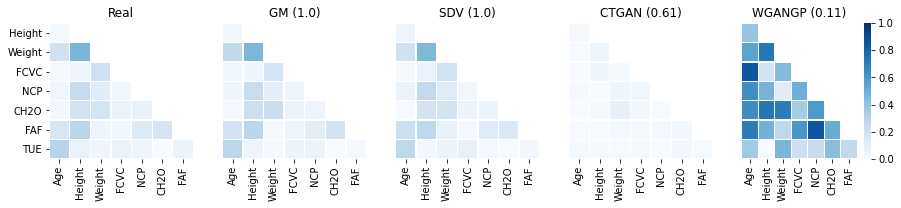

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 2.5))
axs_idxs = range(6)
idx = dict(zip(DATA_TYPES,axs_idxs))

for name_idx, name in enumerate(DATA_TYPES) :
    ax = axs[idx[name]]
    matrix = cors_numerical[name]
    
    if name_idx != len(DATA_TYPES) - 1:
        plot_correlations(matrix, ax, color_bar=False)
    else:
        plot_correlations(matrix, ax, color_bar=True)
    
    if name_idx > 0:
        ax.set_yticks([])    
    
    if name == 'Real' :
        ax.set_title(name)
    else :
        score = compute_mra_score(cors_numerical['Real'], matrix)
        ax.set_title(name + ' (' + str(score) + ')')
    
fig.savefig('MULTIVARIATE RESEMBLANCE RESULTS/PPC_Matrices.svg', bbox_inches='tight')

## 3. Plot correlations for categorical variables and calculate matrixes norms

In [7]:
#compute correlation matrixes for all datasets
cors_categorical = dict()
norms_categorical = dict()
for name in DATA_TYPES :
    cors_categorical[name], norms_categorical[name] = get_categorical_correlations(data[name])
norms_categorical

{'Real': 2.3376,
 'GM': 1.9032,
 'SDV': 2.6217,
 'CTGAN': 2.3365,
 'WGANGP': 3.0898}

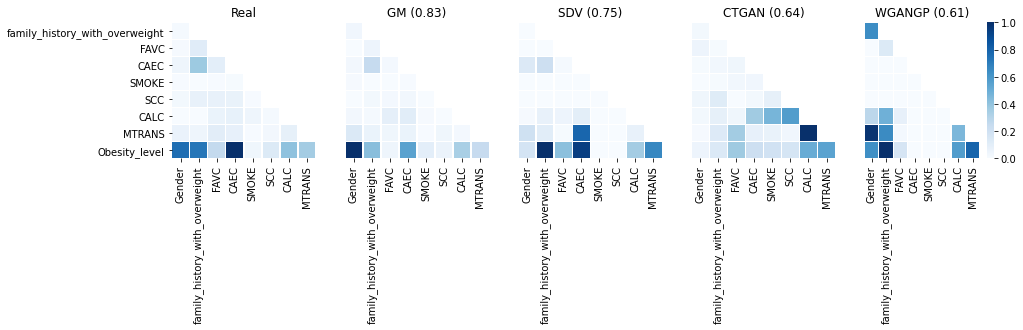

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 2.5))
axs_idxs = range(6)
idx = dict(zip(DATA_TYPES,axs_idxs))
first = True

for name_idx, name in enumerate(DATA_TYPES) :
    ax = axs[idx[name]]
    matrix = cors_categorical[name]
    
    if name_idx != len(DATA_TYPES) - 1:
        plot_correlations(matrix, ax, color_bar=False)
    else:
        plot_correlations(matrix, ax, color_bar=True)
    
    if name_idx > 0:
        ax.set_yticks([])    

    if name == 'Real' :
        ax.set_title(name)
    else :
        score = compute_mra_score(cors_categorical['Real'], matrix)
        ax.set_title(name + ' (' + str(score) + ')')
        
fig.savefig('MULTIVARIATE RESEMBLANCE RESULTS/Categorical_Matrices.svg', bbox_inches='tight')

## 4. Explore the results

In [9]:
norms_numerical

{'Real': 3.0756, 'GM': 3.0818, 'SDV': 3.0716, 'CTGAN': 2.836, 'WGANGP': 4.8225}

In [10]:
norms_categorical

{'Real': 2.3376,
 'GM': 1.9032,
 'SDV': 2.6217,
 'CTGAN': 2.3365,
 'WGANGP': 3.0898}

In [11]:
norms_data = [np.asarray(list(norms_numerical.values())), np.asarray(list(norms_categorical.values()))]
df_norms = pd.DataFrame(data=norms_data, columns=DATA_TYPES, index=['PPC_MATRIX_NORMS','CATEGORICAL_CORS_MATRIX_NORMS'])
df_norms.to_csv('MULTIVARIATE RESEMBLANCE RESULTS/Correlation_Matrix_Norms.csv')
df_norms

,Real,GM,SDV,CTGAN,WGANGP
PPC_MATRIX_NORMS,3.0756,3.0818,3.0716,2.8360,4.8225
CATEGORICAL_CORS_MATRIX_NORMS,2.3376,1.9032,2.6217,2.3365,3.0898
